# Imports and loading data

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchmetrics
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#use iris dataset for multi-class example
from sklearn import datasets 
iris = datasets.load_iris()
X = iris.data
y = iris.target
#create torch dataset
dataset = TensorDataset(torch.tensor(X).float(),torch.tensor(y).float())

# 1. Introduction to deep lerarning with PyTorch

## 1.1 Intro
### Tensors

In [4]:
#create from list
array = [[1,2,3],[4,5,6]]
tensor = torch.tensor(array)
tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [5]:
#create from np array
np_array = np.array([[4,5,6],[9,8,7]])
tensor = torch.from_numpy(np_array)
tensor

tensor([[4, 5, 6],
        [9, 8, 7]], dtype=torch.int32)

In [6]:
#tensor shape - returns the dimensions of a tensor
tensor.shape

torch.Size([2, 3])

In [7]:
#tensor data type - returns the datatype contained within
tensor.dtype

torch.int32

In [8]:
#tensor device - where tensor is loaded in memory gpu/cpu
tensor.device

device(type='cpu')

### Tensor Operations

In [9]:
a=torch.tensor([[1,1],[2,2]])
b=torch.tensor([[2,2],[3,3]])
print(a)
print(b)

tensor([[1, 1],
        [2, 2]])
tensor([[2, 2],
        [3, 3]])


In [10]:
#multiply
a*b

tensor([[2, 2],
        [6, 6]])

In [11]:
#divide
a/b

tensor([[0.5000, 0.5000],
        [0.6667, 0.6667]])

In [12]:
#subract
a-b

tensor([[-1, -1],
        [-1, -1]])

In [13]:
#tensors must be compatible for operation 
#(e.g. incompatible shapes)
a=torch.tensor([[1,2,3],[4,5,6]])
b=torch.tensor([[4,3],[5,9]])
a-b

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

## 1.2 Creating our First Neural Network

### Linear Layers

In [16]:
#create input tensor with 3 features
input_tensor=torch.tensor([[1.0,2.2,3.1]])
#define linear layer
linear_layer=nn.Linear(in_features=3,out_features=2)
#pass input tensor to linear layer to create output
output=linear_layer(input_tensor)
output

tensor([[-1.6159, -2.2132]], grad_fn=<AddmmBackward0>)

Each linear layer contains weights and, these are used to compute the layers output (formula below), these weights and biases are initialized to random values and are not useful until they are trained through back propagation

$$y_0=W_0\cdot X+b_0$$

Where:
- y0 : output
- W0 : Weight 0
- B0 : Bias 0
- X : input

In [17]:
#weight attribute
linear_layer.weight

Parameter containing:
tensor([[-0.4633, -0.1475, -0.2981],
        [ 0.4173, -0.4987, -0.4079]], requires_grad=True)

In [18]:
#bias attribute
linear_layer.bias

Parameter containing:
tensor([ 0.0960, -0.2687], requires_grad=True)

### Stacking multiple layers

We can combined multiple layers together in a neural network

In [19]:
#create network with three linear layers
#accomodating 10 input feats, return 2 output feats
model = nn.Sequential(
    nn.Linear(10,18),
    nn.Linear(18,20),
    nn.Linear(20,2)
)

In [22]:
#create input tensor of random floats
input_tensor = torch.from_numpy(np.random.rand(10)).float()
print('input_tensor: ',input_tensor)
#pass input tensor to stacked model
output_tensor=model(input_tensor)
print('output_tensor: ',output_tensor)

input_tensor:  tensor([0.0501, 0.2403, 0.9182, 0.6612, 0.3534, 0.4971, 0.8569, 0.4130, 0.8989,
        0.7452])
output_tensor:  tensor([-0.0005,  0.1278], grad_fn=<ViewBackward0>)


## 1.3 Discovering Activation Functions

Activation functions add non-linearity to the newtwork

A model can learn more complex relationships with non-linearity

### Sigmoid function

Transform to output single value ranging 0:1 for binary classification

Text(0.5, 1.0, 'Sigmoid Activation Function')

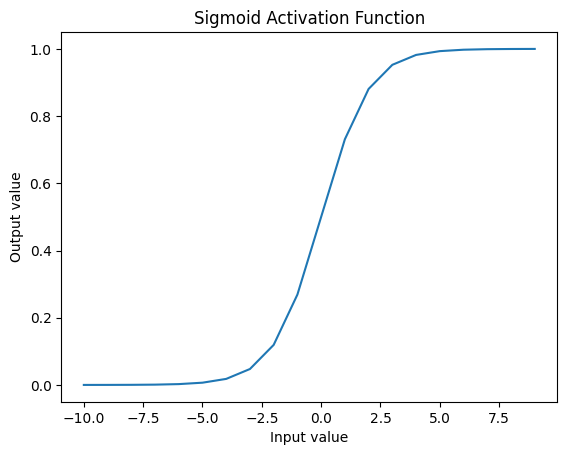

In [46]:
sigmoid_dict={'x':[], 'y':[]}

#iterate through values -10:10  calculate sigmoid output
for i in range(-10,10,1):
    sigmoid_dict['x'].append(i)
    input_tensor = torch.tensor([[float(i)]])
    sigmoid = nn.Sigmoid()
    output = sigmoid(input_tensor)
    sigmoid_dict['y'].append(output.item())

#plot sigmoid function
plt.plot(sigmoid_dict['x'],sigmoid_dict['y'])
plt.xlabel('Input value')
plt.ylabel('Output value')
plt.title('Sigmoid Activation Function')

In [47]:
#combine sequential model to transform 10 inputs to binray ouput
model=nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid(),
)

input_tensor = torch.from_numpy(np.random.rand(6)).float()
model(input_tensor)

tensor([0.5481], grad_fn=<SigmoidBackward0>)

### Softmax

Used for multi-class classifier, returns probability distribution across all potential classes

In [49]:
#create input tensor
input_tensor = torch.tensor([[4.3,6.1,2.3]])
#apply softmax along the last dimension
probabilities = nn.Softmax(dim=-1)
output_tensor = probabilities(input_tensor)
print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


In [50]:
#dim -1 applies softmax to last dimension only:
input_tensor = torch.tensor([[2.7,4.5,6.3],[4.3,6.1,2.3]])
input_tensor[-1]

tensor([4.3000, 6.1000, 2.3000])

In [51]:
#use sequential model to stack layers for:
#6 input features
#returning sigmoid output of 4 classes

model=nn.Sequential(
    nn.Linear(6,10),
    nn.Linear(10,4),
    nn.Softmax()
)

input_tensor = torch.from_numpy(np.random.rand(6)).float()
model(input_tensor)

c:\Users\Ciaran\Documents\Python Scripts\Data Camp\.venv\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0.3392, 0.2526, 0.2077, 0.2004], grad_fn=<SoftmaxBackward0>)

# 2. Training Our First Neural Network with PyTorch

To train a neural network in PyTorch, you will first need to understand the job of a loss function. You will then relize that training a network requires minimizing that loss function, which is done by calculating gradients. You will learn how to use these gradients to update your models parameters and finally write training loops

## 2.1 Running a Forward Pass

What is forward Pass:
- Input data is passed forward or propogated through the network
- Computations performed at each layer
- Outputs of each layer passed to each subsequent layer
- Output of final layer: "prediction"
- Used for both training and prediction

Possible outputs:
- Binary Classfifcation: Single probability betwenn 0:1
- Multiclass Classfifcation: Distribution of probabilities summing to 1
- Regression Values: Continuous numerical prediction

### Binary Classification

In [53]:
#take first 5 rows of iris input features
input_data = dataset[0:6][0]
input_data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000]])

In [54]:
#create binary classification model
model=nn.Sequential(
    nn.Linear(4,6), #first linear layer accepts 4 input feats
    nn.Linear(6,1), #second layer returns single value
    nn.Sigmoid() #sigmoid function returns probability value 0:1
)

In [56]:
#pass input through model
output = model(input_data)
output

tensor([[0.7452],
        [0.7391],
        [0.7377],
        [0.7476],
        [0.7471],
        [0.7601]], grad_fn=<SigmoidBackward0>)

### Multiclass Classification

In [57]:
#create multi-class classification model
model=nn.Sequential(
    nn.Linear(4,6), #first linear layer accepts 4 input feats
    nn.Linear(6,3), #second layer returns 3 values
    nn.Softmax(dim=-1) #softmax function returns probability across 3 classes
)

#pass input to model
output=model(input_data)
print(output)

tensor([[0.8212, 0.0509, 0.1279],
        [0.8106, 0.0584, 0.1309],
        [0.8080, 0.0589, 0.1331],
        [0.8090, 0.0609, 0.1301],
        [0.8210, 0.0510, 0.1280],
        [0.8410, 0.0445, 0.1144]], grad_fn=<SoftmaxBackward0>)


### Regression

In [58]:
#create regression model
model=nn.Sequential(
    nn.Linear(4,6), #first linear layer accepts 4 input feats
    nn.Linear(6,1), #second layer returns single value
)

#pass input to model
output=model(input_data)
print(output)

tensor([[0.2289],
        [0.1581],
        [0.1944],
        [0.1273],
        [0.2346],
        [0.2537]], grad_fn=<AddmmBackward0>)


## 2.2 Using loss function to asses model predictions

Why do we need a loss function?
- Gives feedback to model during training
- Takes in model preidction y^ and ground truth y
- Outputs a float

In [62]:
# use 1-hot encoding to transform numeric label to vector
for i in range(3):
    one_hot = F.one_hot(torch.tensor(i),num_classes=3)
    print(i)
    print(one_hot)

0
tensor([1, 0, 0])
1
tensor([0, 1, 0])
2
tensor([0, 0, 1])


### Cross entropy loss in PyTorch

Loss function inputs:
- scores: model predictions before final softmax
- on hot target: one hot encoded ground truth label

Loss function outputs:
- loss: a single float value (small value indicates better prediction)

goal is to minimize loss

In [65]:
#lets say we have a 3 class multi-class prediction problem
#our predicted probability distribution
prediction=torch.tensor([0.65,0.11,0.24])
#ground truth class is 2
g_truth=2
#one-hot encode
one_hot = F.one_hot(torch.tensor(g_truth),num_classes=3)
#instantiate cross entropy loss object
criterion = nn.CrossEntropyLoss()
#return loss value comparing predicted to grount truth
criterion(prediction.double(),one_hot.double())

tensor(1.2193, dtype=torch.float64)

In [71]:
#compare loss for correct prediction
prediction=torch.tensor([1.0,0.0,0.0])
one_hot = F.one_hot(torch.tensor(0),num_classes=3)
criterion(prediction.double(),one_hot.double())

tensor(0.5514, dtype=torch.float64)

## 2.3 Using derivatives to update model parameters

When training we need to minimize loss

Using walking into valley as analogy:
- Steep slope: a step results in large loss of elevation (high derivative)
- Gentle slope: a step results in small loss of elevation (low derivative)
- No slope: Bottom of valley, step results in no elevation loss (null derivative)

### Back propagation
Consider a network consisting of 3 layers: L0, L1, L2
- We calculate the local gradients for each layer using back propagation
- We calculate loss gradients with respect to L2, then use L2 gradients to calculate L1 gradients, and so on

In [182]:
#select 5 rows from iris dataset at rand
rand_idx=np.random.randint(0,y.shape[0],5)
sample_set=dataset[rand_idx]
sample_set

(tensor([[5.0000, 2.0000, 3.5000, 1.0000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [7.6000, 3.0000, 6.6000, 2.1000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [5.4000, 3.4000, 1.7000, 0.2000]]),
 tensor([1., 0., 2., 2., 0.]))

In [183]:
#create model and run forward pass
model=nn.Sequential(
    nn.Linear(4,6),
    nn.LeakyReLU(),
    nn.Linear(6,3),
    nn.Softmax(dim=-1)
)
prediction = model(sample_set[0])
prediction

tensor([[0.4391, 0.0426, 0.5183],
        [0.4511, 0.0766, 0.4723],
        [0.4345, 0.0121, 0.5534],
        [0.4835, 0.0178, 0.4987],
        [0.4565, 0.0537, 0.4898]], grad_fn=<SoftmaxBackward0>)

In [184]:
#calculate loss and compute gradients
criterion=nn.CrossEntropyLoss()
loss=criterion(prediction,sample_set[1].long())
#initiate back propagation
loss.backward()

In [185]:
#access each layers gradients
for layer in range(3):
    print('\nLayer: ',layer)
    if 'weight' in model[layer].state_dict():
        print('Weight: ',model[layer].weight)
        print('Weight gradient: ',model[layer].weight.grad)
        print('Bias: ',model[layer].bias)
        print('Bias gradient: ',model[layer].bias.grad)
    else:
        print(model[layer])


Layer:  0
Weight:  Parameter containing:
tensor([[ 0.1785, -0.1756,  0.4880, -0.1493],
        [ 0.4510, -0.0177,  0.0288,  0.2869],
        [ 0.0270, -0.4527, -0.4003,  0.2359],
        [ 0.1525, -0.0521,  0.0110,  0.3992],
        [-0.2708,  0.3412, -0.0997, -0.4745],
        [ 0.2572,  0.2450,  0.3949,  0.3635]], requires_grad=True)
Weight gradient:  tensor([[-6.1183e-02,  2.0776e-03, -1.1089e-01, -5.1591e-02],
        [-8.8642e-03, -5.4706e-03, -6.0265e-03, -2.9771e-03],
        [ 3.5409e-04, -1.9668e-05,  6.5508e-04,  3.0454e-04],
        [ 9.0658e-02, -2.9620e-03,  1.6411e-01,  7.6355e-02],
        [-6.2518e-04,  6.8774e-05, -1.2158e-03, -5.6422e-04],
        [ 2.9337e-03, -4.7856e-03,  1.3469e-02,  6.1252e-03]])
Bias:  Parameter containing:
tensor([ 0.1947, -0.0958, -0.0992,  0.1769, -0.0610, -0.2224],
       requires_grad=True)
Bias gradient:  tensor([-1.5262e-05, -6.2766e-04, -7.4000e-07,  3.5249e-05,  4.9963e-06,
        -5.0707e-04])

Layer:  1
LeakyReLU(negative_slope=0.01

Given one forward pass, we have the above weights and biases, to train the model to accurately predict, we will need to update the weights using back propagation and gradient descent

### Gradient descent
- For non-convex functions, we will use an iterative process (gradient descent)
- In PyTorch, an optimizer takes care of weight updates
- The most common optimizer is stochastic gradient descent (SGD)
- Optimizer handles updating model weights after calculation of local gradients

In [186]:
#create an optimizer
optimizer = optim.SGD(model.parameters(),lr=0.1)
#update parameters based upon calculated gradients
optimizer.step()

In [187]:
#access each layers gradients
for layer in range(3):
    print('\nLayer: ',layer)
    if 'weight' in model[layer].state_dict():
        print('Weight: ',model[layer].weight)
        print('Weight gradient: ',model[layer].weight.grad)
        print('Bias: ',model[layer].bias)
        print('Bias gradient: ',model[layer].bias.grad)
    else:
        print(model[layer])


Layer:  0
Weight:  Parameter containing:
tensor([[ 0.1846, -0.1758,  0.4991, -0.1442],
        [ 0.4519, -0.0171,  0.0294,  0.2872],
        [ 0.0270, -0.4527, -0.4004,  0.2358],
        [ 0.1435, -0.0518, -0.0054,  0.3915],
        [-0.2708,  0.3412, -0.0996, -0.4744],
        [ 0.2569,  0.2455,  0.3936,  0.3629]], requires_grad=True)
Weight gradient:  tensor([[-6.1183e-02,  2.0776e-03, -1.1089e-01, -5.1591e-02],
        [-8.8642e-03, -5.4706e-03, -6.0265e-03, -2.9771e-03],
        [ 3.5409e-04, -1.9668e-05,  6.5508e-04,  3.0454e-04],
        [ 9.0658e-02, -2.9620e-03,  1.6411e-01,  7.6355e-02],
        [-6.2518e-04,  6.8774e-05, -1.2158e-03, -5.6422e-04],
        [ 2.9337e-03, -4.7856e-03,  1.3469e-02,  6.1252e-03]])
Bias:  Parameter containing:
tensor([ 0.1947, -0.0958, -0.0992,  0.1769, -0.0610, -0.2224],
       requires_grad=True)
Bias gradient:  tensor([-1.5262e-05, -6.2766e-04, -7.4000e-07,  3.5249e-05,  4.9963e-06,
        -5.0707e-04])

Layer:  1
LeakyReLU(negative_slope=0.01

## 2.4 Writing our first training loop

1. Create model
2. Choose loss function
3. Create a dataset
4. Define an optimizer
5. Run a training loop, where for each sample of the dataset, we repeat:
    - Calculating loss (forward pass)
    - Calculating local gradients
    - Updating model parameters

In [202]:
#use diabetes  dataset for regression problem example
from sklearn import datasets 
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
#create torch dataset
diabetes_dataset = TensorDataset(torch.tensor(X).float(),torch.tensor(y).float())
#create dataloader
diabetes_dataloader = DataLoader(diabetes_dataset, batch_size=4, shuffle=True)

In [203]:
#create model
model = nn.Sequential(
    nn.Linear(10,6),
    nn.Linear(6,1))

In [204]:
#define loss criteria for regression MSE
criterion = nn.MSELoss()
#define optimizer
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [221]:
#loop through dataset multiple times
num_epochs=5
for epoch in range(num_epochs):
    print('Epoch: ',epoch)
    for data in diabetes_dataloader:
        #set gradients to zero
        optimizer.zero_grad()
        #get features and target from data loader
        features, target = data
        #run forward pass
        prediction = model(features)
        #compute loss 
        loss = criterion(prediction,target.unsqueeze(1))
        #compute gradients
        loss.backward()
        #update parameters
        optimizer.step()

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4


# 3. Neural Netwoork Architecture & Hyperparameters

Hyperparameters are parameters, often chosen by the user, that control model training. The type of activation function, the number of layers i the model, and the learning rate are all hyperparameters of neural network training.

## 3.1 Discovering activation functions between layers

### ReLU

- Rectified Linear Unit (ReLU)
- Overcomes vanishing gradient of sigmoid function
- However negative values return null slope

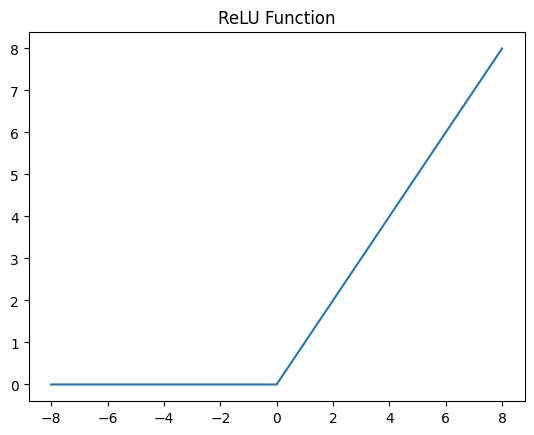

In [222]:
relu = nn.ReLU()
x=[i for i in range(-8,9,1)]
y=[relu(torch.tensor(i)).item() for i in x]
plt.plot(x,y)
plt.title('ReLU Function')
plt.show()

### Leaky ReLU
- similar to ReLU however negative input vals return non null vals

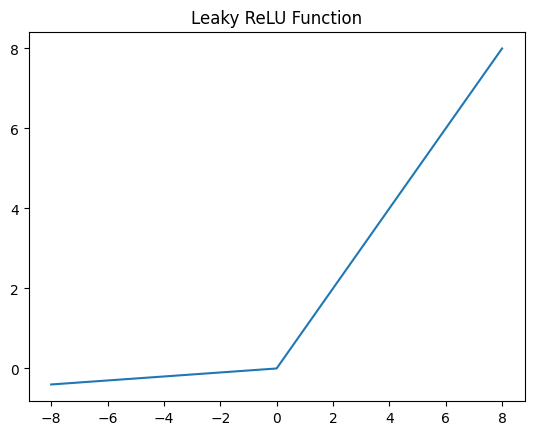

In [223]:
leaky_relu=nn.LeakyReLU(negative_slope=0.05)
x=[i*1.0 for i in range(-8,9,1)]
y=[leaky_relu(torch.tensor(i)).item() for i in x]
plt.plot(x,y)
plt.title('Leaky ReLU Function')
plt.show()

## 3.2 Deeper dive into neural network architecture

### Counting Parameters
If we have a model structured of:
- input layer of 8 neurons
- hidden layer of 4 neurons
- output layer of 2 neurons

We can calculate the number of parameters as such:
- Hidden layer has 4 neurons, each neuron has 8 weight and 1 bias parameter = 36 parameters
- output layer has 2 neurons, each neuron has 4 weight and 1 bias parameter = 10 parameters
- Total = 46 parameters

In [224]:
model = nn.Sequential(
    nn.Linear(8,4),
    nn.Linear(4,2)
    )

# .numel() returns num elements in tensor
# iterate over model to sum elements

total=0
for param in model.parameters():
    total+=param.numel()

print(total)

46


## 3.3 Learning Rate and Momentum

- Learning Rate
    - controls the step size during optimization
    - values too small lead to long training times
    - values too high lead to poor performance
    - typical values [10<sup>-4</sup> : 10<sup>-2</sup>]
- Momentum
    - controls the inertia of the optimizer
    - Null momentum leads to optimizer being stuck in local minimum
    - Non-null momentum can help find global minimum
    - Typical values [0.85 : 0.99]

## 3.4 Layer Initialization and transfer learning

- layer weights are intialized to small values
- layer output can explode if inputs and weights not normalized
- weights can be initialized using diff methods (uniform dist etc)

In [227]:
#layer initialization
layer = nn.Linear(64,128)
#print min and max of layer weights
print(layer.weight.min(),layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)


Text(0, 0.5, 'Count')

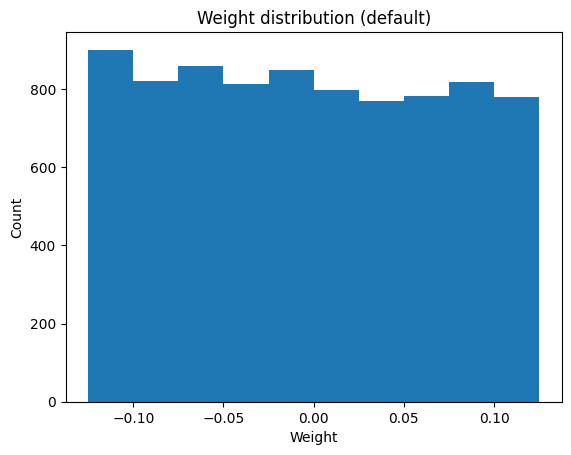

In [236]:
plt.hist(layer.state_dict()['weight'].flatten())
plt.title('Weight distribution (default)')
plt.xlabel('Weight')
plt.ylabel('Count')

In [237]:
# nn.init allows us to initialize layers with specifications
# initialize with uniform dist
nn.init.uniform_(layer.weight)
print(layer.weight.min(),layer.weight.max())

tensor(2.8610e-06, grad_fn=<MinBackward1>) tensor(1.0000, grad_fn=<MaxBackward1>)


Text(0, 0.5, 'Count')

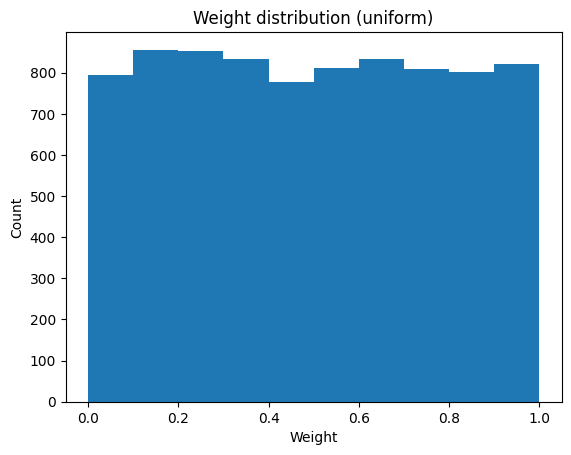

In [238]:
plt.hist(layer.state_dict()['weight'].flatten())
plt.title('Weight distribution (uniform)')
plt.xlabel('Weight')
plt.ylabel('Count')

In [239]:
# initialize with normal dist
nn.init.normal_(layer.weight)
print(layer.weight.min(),layer.weight.max())

tensor(-3.7939, grad_fn=<MinBackward1>) tensor(3.8535, grad_fn=<MaxBackward1>)


Text(0, 0.5, 'Count')

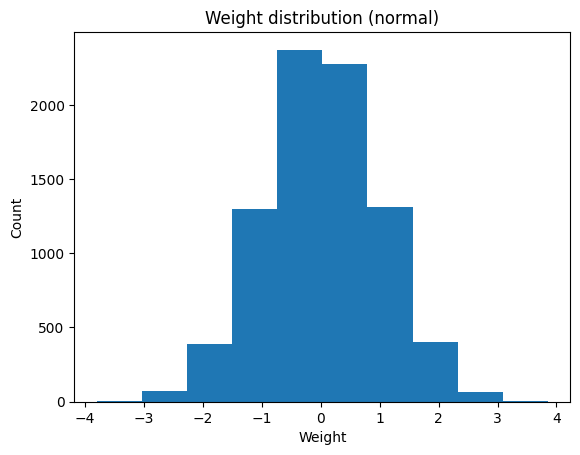

In [240]:
plt.hist(layer.state_dict()['weight'].flatten())
plt.title('Weight distribution (normal)')
plt.xlabel('Weight')
plt.ylabel('Count')

### Transfer Learning

Taking weight trained on an initial model being used as a starting point for similar problem, accelerates training process

E.g. model initially trained on water quality in USA, weights can be used as starting point for water quality model in Canada

In [241]:
#save weights
torch.save(layer, './weights/norm_dist_layer.pth')

In [242]:
#load weights
new_layer = torch.load('./weights/norm_dist_layer.pth')

### Fine tuning

A subset of transfer learning where we use previously trained weights as starting point for further training on new related dataset

Generally:
- Smaller learning rate
- Not every layer is trained (we freeze some layers)
- Freeze early layers of network, fine-tune layers closer to output

In [245]:
model = nn.Sequential(
    nn.Linear(64,128),
    nn.Linear(128,256))

#iterate through parameters
for name, param in model.named_parameters():
    print(f'Name: {name}')

    #freeze gradients of layer 0
    if name == '0.weight':
        param.requires_grad=False
        print(f'Requires gradient: {param.requires_grad}')
    else:
        print(f'Requires gradient: {param.requires_grad}')

Name: 0.weight
Requires gradient: False
Name: 0.bias
Requires gradient: True
Name: 1.weight
Requires gradient: True
Name: 1.bias
Requires gradient: True


# 4. Evaluating and Improving Models
Training a deep learning model is an art, and to make sure our model is trained correctly, we need to keep track of certain metrics during training, such as the loss or the accuracy. We will earn how to calculate such metrics and how to reduce overfitting using an image dataset as an example

## 4.1 A deeper dive into loading data

In [247]:
# we can load data from a local csv via pandas
animals=pd.read_csv('./data/animals.csv')
animals

,animal_name,hair,feathers,eggs,milk,predator,fins,legs,tail,type
0,skimmer,0,1,1,0,1,0,2,1,2
1,gull,0,1,1,0,1,0,2,1,2
2,seahorse,0,0,1,0,0,1,0,1,4
3,tuuatara,0,0,1,0,1,0,4,1,3
4,squirrel,1,0,0,1,0,0,2,1,1


In [249]:
# we can use column indexing to select our input features
features=animals[animals.columns[1:-1]]
# transform to float data type
X=np.array(features).astype(float)
print(X)

[[0. 1. 1. 0. 1. 0. 2. 1.]
 [0. 1. 1. 0. 1. 0. 2. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 2. 1.]]


In [251]:
#we can extract the "type" column as our target variable
target=animals[animals.columns[-1]]
y=np.array(target).astype(float)
print(y)

[2. 2. 4. 3. 1.]


### TensorDataset
TensorDataset is a class to setup a PyTorch dataset for tensors

In [252]:
#instantiate dataset class
dataset=TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [253]:
#accessing an individual sample
sample = dataset[0]
# dataset indexing returns tuple of input and label
input_sample, label_sample = sample
print('input_sample: ',input_sample)
print('label_sample: ',label_sample)

input_sample:  tensor([0., 1., 1., 0., 1., 0., 2., 1.])
label_sample:  tensor(2.)


### DataLoader
This class accepts a PyTorch dataset and provides the ability to iterate through data via batching

In [254]:
#create dataloader object
dataloader=DataLoader(dataset,batch_size=2,shuffle=True)

In [255]:
#iterate over dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch_inputs: ',batch_inputs)
    print('batch_labels: ',batch_labels)

batch_inputs:  tensor([[0., 1., 1., 0., 1., 0., 2., 1.],
        [0., 0., 1., 0., 1., 0., 4., 1.]])
batch_labels:  tensor([2., 3.])
batch_inputs:  tensor([[1., 0., 0., 1., 0., 0., 2., 1.],
        [0., 1., 1., 0., 1., 0., 2., 1.]])
batch_labels:  tensor([1., 2.])
batch_inputs:  tensor([[0., 0., 1., 0., 0., 1., 0., 1.]])
batch_labels:  tensor([4.])


## 4.2 Evaluating Model Performance

Datasets will be divided into 3 subsets:
- Training: ~80% of our data used to adjust model parameters
- Validation: ~10-15% of data used for hyperparameter tuning
- Testing ~5-10% only used once to calculate final metrics


In [267]:
#use iris dataset for example
from sklearn import datasets 
iris = datasets.load_iris()
X = iris.data
y = iris.target
#create torch dataset
dataset = TensorDataset(torch.tensor(X).float(),torch.tensor(y).float())
#split to train(80%), test(10%) and valid(10%)
train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(dataset,[0.8,0.1,0.1])
#create trainloader, validationloader, dataloader
trainloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=2, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

In [268]:
#create model
model=nn.Sequential(
    nn.Linear(4,8),
    nn.Linear(8,3),
    nn.Softmax()
)

### Calculating Training Loss
For each epoch:
- we sum up the loss for each iteration of training set dataloader
- at the end of epoch we calculate the mean training loss

In [278]:
#instantiate cross entropy loss object
criterion = nn.CrossEntropyLoss()
#define optimizer
optimizer=optim.SGD(model.parameters(),lr=0.001)
num_epochs=5


for epoch in range(num_epochs):
    training_loss=0.0
    print('Epoch: ',epoch)
    for inputs, labels in trainloader:
        #set gradients to 0
        optimizer.zero_grad()
        #run forward pass
        preds = model(inputs)
        #encode true labels as 1-hot encoded
        one_hot = F.one_hot(labels.long(),num_classes=3)
        #return loss value comparing predicted to ground truth
        loss = criterion(preds.double(),one_hot.double())
        #update training loss
        training_loss+=loss.item()
        #calculate gradients
        loss.backward()
        #update parameters
        optimizer.step()
    epoch_loss = training_loss/len(trainloader)
    print('epoch_loss: ',epoch_loss)

Epoch:  0
epoch_loss:  1.126719937950912
Epoch:  1
epoch_loss:  1.1081453449571788
Epoch:  2
epoch_loss:  1.0949575374985072
Epoch:  3
epoch_loss:  1.0857142755855236
Epoch:  4
epoch_loss:  1.078660782466581


### Calculating Validation Loss
After the training epoch, we iterate over the validation set and calculate the average validation loss

In [288]:
validation_loss=0.0
#put model into evaluation mode
model.eval()
#no need to update gradients
with torch.no_grad():
    for inputs,labels in validloader:
        #run forward pass
        preds = model(inputs)
        #encode true labels as 1-hot encoded
        one_hot = F.one_hot(labels.long(),num_classes=3)
        #return loss value comparing predicted to ground truth
        loss = criterion(preds.double(),one_hot.double())
        validation_loss+=loss.item()
epoch_loss = validation_loss/len(validloader)
print('epoch_loss: ',epoch_loss)
#return to training mode
model.train()

epoch_loss:  1.0837677222906232


Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=3, bias=True)
  (2): Softmax(dim=None)
)

### Calculating accuracy with torchmetrics


In [313]:
#create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task='multiclass',num_classes=3)
# iterate over validation set
for inputs,labels in validloader:
    #forward pass
    preds=model(inputs)
    #calculate accuracy over the batch
    acc = metric(preds.argmax(dim=-1),labels)
#calculate accuracy over the whole epoch
acc=metric.compute()
print(f'Accuracy on all data: {acc}')
#Reset metric for the next epoch (training or validation)
metric.reset()

Accuracy on all data: 0.6666666865348816


## 4.3 Fighting Overfitting

Overfitting: the model does not generalize to unseen data.
- model memorizes training data
- good performance on the training set/poor performance on validation set

Possible causes:
- Dataset is not large neough
    - Solution: Get more data/augment existing data
- Model hass too much capacity
    - Solution: Reduce model size/add dropout
- Weights are too large
    - Solution: Weight decay


### "Regularization" using a **dropout** layer
- A random fraction of input neurons are set to 0 *during training*
- Corresponding connections are temporarily removed from the network, making model less likely to over rely on specific features
- Important note: dropout behaves different for train and valid, must remeber to change modes `model.train()` and `model.eval()` as appropriate

In [345]:
#create model with dropout layer
model = nn.Sequential(
    nn.Linear(16,10),
    nn.ReLU(), #drop out layers generally go after activation functions
    nn.Dropout(p=0.10) # p = probability of drop out (10% of neurons will be set to 0)
)
features=torch.randn((1,16)).float()
model(features)

tensor([[0.0324, 1.1737, 0.1897, 0.0000, 0.2462, 0.0000, 0.0000, 0.0000, 0.7157,
         0.0000]], grad_fn=<MulBackward0>)

### "Regularization" using a **weight decay**

`optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)`

- Optimizer weight_decay parameter takes value between zero and one
    - Typically small value e.g. 1e-3
- Weight decay adds penalty to loss function to discourage large weights and biases
    - Similar to lasso regression
- The higher the parameter, the less likely the model is to overfit

## 4.4 Improving Model Performance

### Steps to maximize performance
- Overfit the training set
    - If we can overfit a model to training set we can solve the problem
    - This will give us a performance baseline to compare with the validation set
- Reduce overfitting
    - This will help us improve perfomances on the validation set
- Fine-tune hyperparameters
    - Slightly adjust hyperparameters to ensure we achieve best possible performance

### Step 1: Overfit the training set
Modify the training loop to overfit a single data point (batch size of 1)


features:  tensor([[4.9000, 3.1000, 1.5000, 0.1000]])
labels:  tensor([0.])


In [382]:
#create model
model=nn.Sequential(
    nn.Linear(4,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,3),
    nn.Softmax()
)

#select bacth of 1
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
features, labels = next(iter(trainloader))
print('features: ',features)
print('labels: ',labels)

#define loss criteria
criterion=nn.CrossEntropyLoss()
#create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task='multiclass',num_classes=3)
#create an optimizer
optimizer = optim.SGD(model.parameters(),lr=0.1)

for i in range(1000):
    #forward pass
    preds=model(features)
    #convert label to 1-hot
    one_hot = F.one_hot(labels.long(),num_classes=3)
    #calculate loss
    loss=criterion(preds,labels.long())
    #calculate accuracy
    acc = metric(preds.argmax(dim=-1),labels)
    #calculate gradients
    loss.backward()
    #update weights
    optimizer.step()
    if i%100 == 0:
        print(f'{i} of 1000')
        print('preds: ',preds)
        print('loss: ',loss.item())
        print('accuracy: ',acc)

features:  tensor([[7.7000, 3.8000, 6.7000, 2.2000]])
labels:  tensor([2.])
0 of 1000
preds:  tensor([[0.3255, 0.2643, 0.4102]], grad_fn=<SoftmaxBackward0>)
loss:  1.0234966278076172
accuracy:  tensor(1.)
100 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)


c:\Users\Ciaran\Documents\Python Scripts\Data Camp\.venv\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


200 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
300 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
400 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
500 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
600 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
700 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
800 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)
900 of 1000
preds:  tensor([[0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
loss:  0.5514447093009949
accuracy:  tensor(1.)


### Step 2: Overfit the training set
Modify the training loop to overfit a single data point (batch size of 1)


In [369]:
preds

tensor([[0.0966, 0.2343, 0.6691]], grad_fn=<SoftmaxBackward0>)

In [371]:
labels

tensor([0.])

tensor(1.3662, grad_fn=<NllLossBackward0>)

In [ ]:
#loop through dataset multiple times

for epoch in range(num_epochs):
    print('Epoch: ',epoch)
    for data in diabetes_dataloader:
        #set gradients to zero
        optimizer.zero_grad()
        #get features and target from data loader
        features, target = data
        #run forward pass
        prediction = model(features)
        #compute loss 
        loss = criterion(prediction,target.unsqueeze(1))
        #compute gradients
        loss.backward()
        #update parameters
        optimizer.step()

In [264]:
len(test_dataset)

15

In [265]:
len(valid_dataset)

15

In [ ]:

# iterate over validation set
for inputs,labels in validloader:
    #forward pass
    preds=model(inputs)
    #calculate accuracy over the batch
    acc = metric(preds.argmax(dim=-1),labels)
#calculate accuracy over the whole epoch
acc=metric.compute()
print(f'Accuracy on all data: {acc}')
#Reset metric for the next epoch (training or validation)
metric.reset()